In [1]:
"""
Author:   Chuck Stewart
Course:   CSCI 4270 and 6270
Lecture:  02
File:     ex5_stretch_img.ipynb

Purpose: Linearly stretch the gray scale intensities of an input image
based on the cutoff fraction, f, provided on the command-line.  First
we find the maximum intensity --- call it g0 --- such that f of the
pixels have intensity less than or equal to g0.  Then we find the
minimum intensity --- call it g1 --- such that f of the pixels in
the image have intensity greater than or equal to g1.  Then we map the
intensities as follows:

  . All intensities <= g0 are mapped to 0
  . All intensitiess >= g1 are mapped to 255
  . Intensities from g0 to g1 are linearly stretched into the range
    [0,255]

NumPy:  This demonstrates the use of NumPy histograms, cumulative
distributions, the where function, indexing with a boolean array, and
image arithmetic.
"""

import cv2
import numpy as np
from matplotlib import pyplot as plt

In [2]:
"""
Read the image, converting it to grayscale (or preserving it as grayscale).
"""
image_fn = "/Users/stewart/Dropbox/cv_2025_spring/lec02_images/images/trees_gray.png"
im = cv2.imread(image_fn, cv2.IMREAD_GRAYSCALE)
print(f'Image name: {image_fn}\nImage shape: {im.shape}')

Image name: /Users/stewart/Dropbox/cv_2025_spring/lec02_images/images/trees_gray.png
Image shape: (426, 640)


In [3]:
'''
Set the cutoff fraction. It should be between 0 and 0.5, but generally pretty close to 0.
'''
f = 0.05

In [4]:
'''
The first half of the real work: Form the histogram, convert it to
cumulative distribution, and find the g0 and g1 cutoffs. We do this
all in 6 lines of NumPy code!
'''
hist, bins = np.histogram(im, bins=256, range=(0, 255))  # Use NumPy's histogram rather than OpenCV
cum_dist = np.cumsum(hist) / np.sum(hist)
below_cutoff = np.where(cum_dist <= f)[0]
g0 = below_cutoff[-1]
above_cutoff = np.where(cum_dist >= 1-f)[0]
g1 = above_cutoff[0]
print(f'Using a cutoff fraction of {f}\n' +
      f'gives g0 = {g0}\n' +
      f'and g1 = {g1}')

Using a cutoff fraction of 0.05
gives g0 = 157
and g1 = 249


In [5]:
'''
Run this cell when you want to see the details of the histogram and the cumulative distribution.
'''
print("Histogram")
for i, v in enumerate(hist):
    print(f'\t{i:3d}: {v:5d}')
print()
print("Cumulative distribution")
for i, v in enumerate(cum_dist):
    print(f'\t{i:3d}: {v:7.4f}')

Histogram
	  0:     0
	  1:     0
	  2:     0
	  3:     0
	  4:     0
	  5:     0
	  6:     0
	  7:     0
	  8:     0
	  9:     0
	 10:     0
	 11:     0
	 12:     0
	 13:     0
	 14:     0
	 15:     0
	 16:     0
	 17:     0
	 18:     0
	 19:     0
	 20:     0
	 21:     0
	 22:     0
	 23:     0
	 24:     0
	 25:     0
	 26:     0
	 27:     0
	 28:     0
	 29:     0
	 30:     0
	 31:     0
	 32:     0
	 33:     0
	 34:     0
	 35:     0
	 36:     0
	 37:     0
	 38:     0
	 39:     0
	 40:     0
	 41:     0
	 42:     0
	 43:     0
	 44:     0
	 45:     0
	 46:     0
	 47:     0
	 48:     0
	 49:     0
	 50:     0
	 51:     0
	 52:     0
	 53:     0
	 54:     0
	 55:     0
	 56:     0
	 57:     0
	 58:     0
	 59:     0
	 60:     0
	 61:     0
	 62:     0
	 63:     0
	 64:     0
	 65:     0
	 66:     0
	 67:     0
	 68:     0
	 69:     0
	 70:     0
	 71:     0
	 72:     0
	 73:     0
	 74:     0
	 75:     0
	 76:     0
	 77:     0
	 78:     0
	 79:     0
	 80:     1
	 81:     0
	 82: 

In [6]:
'''
Here is the second half of the real work:  compute the scaled
image by truncating values below g0 at g0, truncating values above
g1 at g1, and linearly scaling the result into the range 0..255.
The procedure is slightly different from what was described in the
introductory comments, but the result is the same.
'''
im_scaled = im.copy()    # requires a deep copy
im_scaled[im_scaled < g0] = g0
im_scaled[im_scaled > g1] = g1
im_scaled = (im_scaled - g0) / (g1 - g0) * 255
im_scaled = im_scaled.astype(im.dtype)

<Figure size 640x480 with 0 Axes>

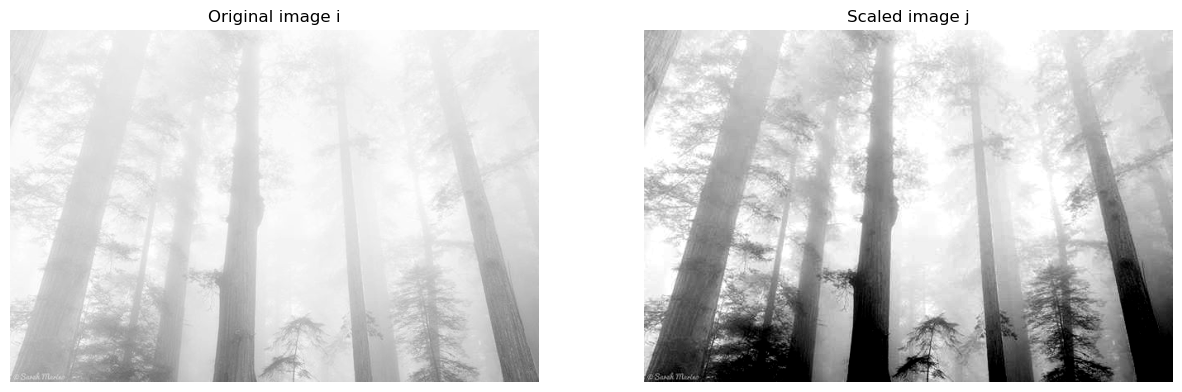

In [7]:
'''
Show the two images side-by-side.  vmin and vmax are set so that
imshow does not automatically scale the images.
'''
plt.gray()
fig, axes = plt.subplots(1, 2, figsize=(15, 15))
axes[0].imshow(im, vmin=0, vmax=255)
axes[0].axis('off')
axes[0].set_title('Original image i')

axes[1].imshow(im_scaled, vmin=0, vmax=255)
axes[1].axis('off')
axes[1].set_title('Scaled image j')

plt.show()